<a href="https://colab.research.google.com/github/aimazin/1st_Web_App_with_Streamlit/blob/main/ltcChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Define the ticker symbol for Litecoin (LTC)
ticker = "LTC-USD"

# Download historical data for the last 7 days with 1-minute intervals
ltc_data = yf.download(tickers=ticker, period="7d", interval="1m")

# Print the first few rows of the data
print(ltc_data.head())


[*********************100%%**********************]  1 of 1 completed

                                Open       High        Low      Close  \
Datetime                                                                
2024-04-28 00:00:00+00:00  83.885483  83.885483  83.885483  83.885483   
2024-04-28 00:01:00+00:00  83.871613  83.871613  83.871613  83.871613   
2024-04-28 00:02:00+00:00  83.870575  83.870575  83.870575  83.870575   
2024-04-28 00:03:00+00:00  83.881340  83.881340  83.881340  83.881340   
2024-04-28 00:05:00+00:00  83.925247  83.925247  83.925247  83.925247   

                           Adj Close  Volume  
Datetime                                      
2024-04-28 00:00:00+00:00  83.885483       0  
2024-04-28 00:01:00+00:00  83.871613       0  
2024-04-28 00:02:00+00:00  83.870575       0  
2024-04-28 00:03:00+00:00  83.881340   61504  
2024-04-28 00:05:00+00:00  83.925247       0  


In [ ]:
ltc_data.describe().Open.shift(2)

count            NaN
mean             NaN
std      8228.000000
min        81.383230
25%         2.343602
50%        74.974937
75%        79.628063
max        81.678734
Name: Open, dtype: float64

In [ ]:
import scipy.stats
from numpy import sqrt, log, exp

N = scipy.stats.norm.cdf

def bs_price(c_p, S, K, r, t, sigma):
    d1 = (log(S/K) + (r + sigma**2/2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)

    if c_p == 'c':
        return N(d1) * S - N(d2) * K * exp(-r * t)
    elif c_p == 'p':
        return N(-d2) * K * exp(-r * t) - N(-d1) * S
    else:
        return "Please specify call or put options."

# Example usage:
S = 100  # Current stock price
K = 100  # Strike price
T = 11   # Time to expiration (in years)
r = 0.01 # Risk-free rate
vol = 0.25 # Initial guess for implied volatility

V_market = bs_price('c', S, K, r, T, vol)  # Market option price
#implied_vol = find_vol(V_market, S, K, T, r)  # Implied volatility
#print(f'Implied vol: {implied_vol * 100:.2f}%')
#print(f'Market price = {V_market:.2f}')
#print(f'Model price = {bs_price("c", S, K, r, T, implied_vol):.2f}')


In [ ]:
call=bs_price('c' ,ltc_data.Open,ltc_data.Open*1.005, 3, .005, .25 )
call=call/call.max()

In [ ]:
put=bs_price('p' ,ltc_data.Close,ltc_data.Close*1.005, 11, .005, .25 )

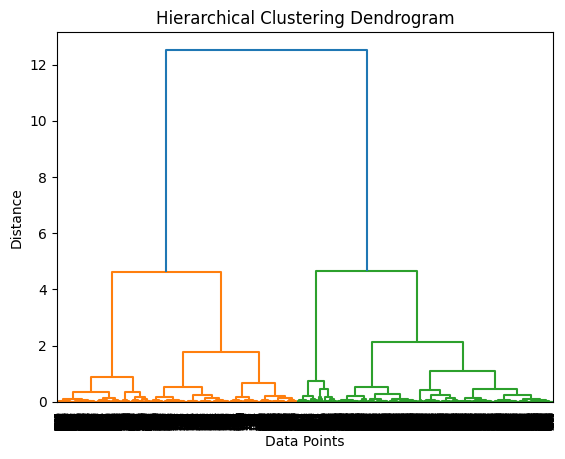

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Combine x and y into a list of data points
data = list(zip(call,put))

# Compute the linkage
linkage_data = linkage(data, method='ward', metric='euclidean')

# Plot the dendrogram
dendrogram(linkage_data)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [ ]:
# Combine x and y into a list of data points
data = list(zip(calli,puti))

# Compute the linkage
linkage_data = linkage(data, method='ward', metric='euclidean')

# Plot the dendrogram
dendrogram(linkage_data)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

RecursionError: maximum recursion depth exceeded while getting the str of an object

In [ ]:
# Prepare the data for Prophet
import numpy as np

df = ltc_data[ 'Close']
df['LogClose'] = np.log(df)

df2 = df['LogClose'].rolling(2).sum()
df3 = df['LogClose'].rolling(3).sum()
df22 = df['LogClose'].rolling(22).sum()
df9 = df['LogClose'].rolling(9).sum()
"""
legl = [1.17]
r = (1-2*np.sqrt(2))/2
for i in range(21, len(df)):
    x = (np.log(1.17 + np.exp(df2.iloc[i]/df3.iloc[i]*df22.iloc[i]/df7.iloc[i]+r)))
    legl.append(x)
milhonest = np.array(legl)
plt.plot(df['Date'][21:], milhonest[1:])
plt.show()"""

<ipython-input-98-f5435d982211>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogClose'] = np.log(df)


"\nlegl = [1.17]\nr = (1-2*np.sqrt(2))/2\nfor i in range(21, len(df)):\n    x = (np.log(1.17 + np.exp(df2.iloc[i]/df3.iloc[i]*df22.iloc[i]/df7.iloc[i]+r)))\n    legl.append(x)\nmilhonest = np.array(legl)\nplt.plot(df['Date'][21:], milhonest[1:])\nplt.show()"

In [ ]:
to=df22/df9
tryto=df9/df3
sett=df22/df3
fathomed=df9/df2
elevat=df22/df2
toel=to*elevat


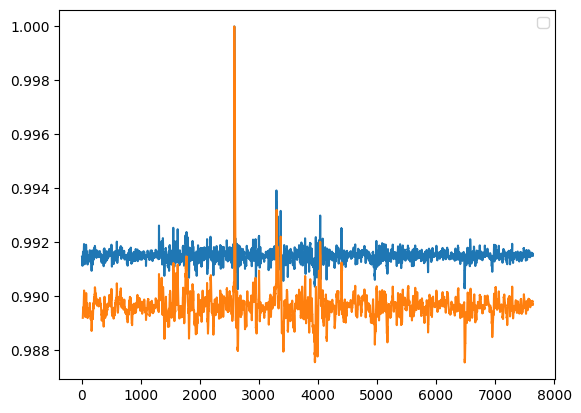

In [ ]:
#plt.plot(np.array(range(len(df22))),to/to.max())
#plt.plot(np.array(range(len(df22))),tryto[-len(df22):]/tryto.max())
#plt.plot(np.array(range(len(df22))),sett[-len(df22):]/sett.max())
plt.plot(np.array(range(len(df22))),fathomed[-len(df22):]/fathomed.max())
plt.plot(np.array(range(len(df22))),elevat[-len(df22):]/elevat.max())
plt.legend()
plt.show()

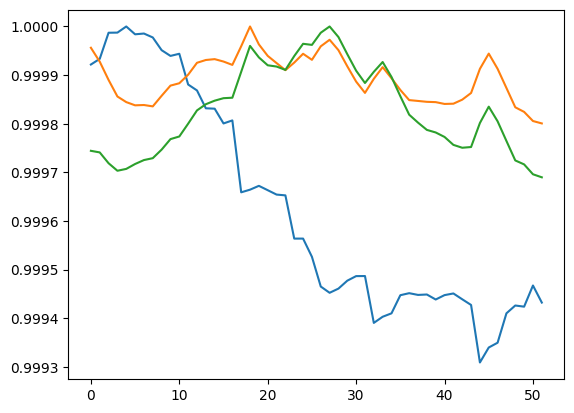

In [ ]:
plt.plot(np.array(df.LogClose[-(52):]/df.LogClose[-(52):].max()))
plt.plot(np.array(range((52))),fathomed[-(52):]/fathomed[-(52):].max())
plt.plot(np.array(range((52))),elevat[-(52):]/elevat[-(52):].max())
#plt.legend()
plt.show()

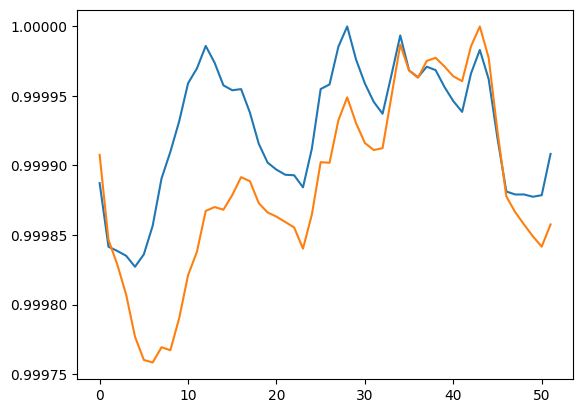

In [ ]:
plt.plot(np.array(range((52))),fathomed[-(52):]/fathomed[-(52):].max())
plt.plot(np.array(range((52))),elevat[-(52):]/elevat[-(52):].max())
#plt.legend()
plt.show()

In [ ]:
calli=fathomed.apply(lambda x: 1 if x >=fathomed.median() else 0.9998)
call=call.apply(lambda x: 1 if x >=call.median() else 0.9998)

In [ ]:
puti=fathomed.apply(lambda x: 1 if x <=fathomed.median() else 0.9998)
puti=toel.apply(lambda x: 1 if x >=toel.mean()*1 else 0.9998)

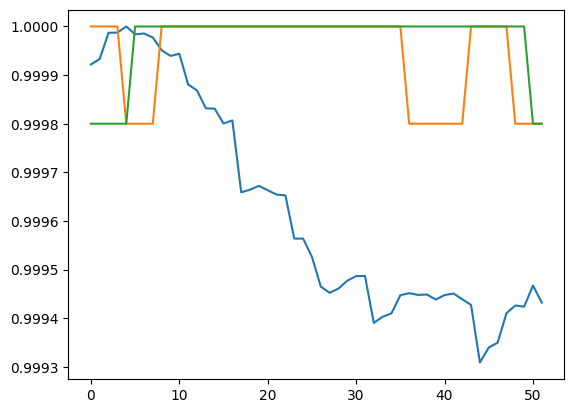

In [ ]:
plt.plot(np.array(df.LogClose[-(52):]/df.LogClose[-(52):].max()))
plt.plot(np.array(range((52))),calli[-(52):]/calli[-(52):].max())
#plt.plot(np.array(range((52))),call[-(52):]/call[-(52):].max())
plt.plot(np.array(range((52))),puti[-(52):]/puti[-(52):].max())
#plt.legend()
plt.show()


In [ ]:
df[:-(52)]/df[:-(52)].max()

Datetime
2024-04-28 00:00:00+00:00    0.981388
2024-04-28 00:01:00+00:00    0.981226
2024-04-28 00:02:00+00:00    0.981214
2024-04-28 00:03:00+00:00     0.98134
2024-04-28 00:05:00+00:00    0.981854
                               ...   
2024-05-04 07:05:00+00:00    0.956908
2024-05-04 07:07:00+00:00    0.956958
2024-05-04 07:08:00+00:00    0.956851
2024-05-04 07:09:00+00:00    0.956926
2024-05-04 07:10:00+00:00    0.957292
Name: Close, Length: 7591, dtype: object

In [ ]:
import scipy.stats
from numpy import sqrt, log, exp
import numpy as np

N = scipy.stats.norm.cdf

def bs_price(c_p, S, K, r, t, sigma):
    d1 = (log(S/K) + (r + sigma**2/2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)

    if c_p == 'c':
        return N(d1) * S - N(d2) * K * exp(-r * t)
    elif c_p == 'p':
        return N(-d2) * K * exp(-r * t) - N(-d1) * S
    else:
        pass


call=bs_price('c' ,ltc_data.Open,ltc_data.Open*1.005, 3, .005, df.std()*np.sqrt(3) )
call=call/call.max()

df['LogClose'] = np.log(df)

df2 = df['LogClose'].rolling(2).sum()
df3 = df['LogClose'].rolling(3).sum()
df22 = df['LogClose'].rolling(22).sum()
df9 = df['LogClose'].rolling(9).sum()

to=df22/df9
fathomed=df9/df2
elevat=df22/df2
toel=to*elevat

calli=fathomed.apply(lambda x: 1 if x >=fathomed.median() else 0.9998)
puti=toel.apply(lambda x: 1 if x >=toel.mean()*1 else 0.9998)
for i in range(len(to)):
  if call[i+1]!=[]:
    if calli[i] != calli[i+1]:
      if puti[i+1] != puti[i+2]:

      else:
        pass
    else:
      pass
  else:
    pass


